# Week 4 handin

## 01 Assignment
Open the file './data/befkbhalderstatkode.csv'
Turn the csv file into a numpy ndarray
Find out how many people lived in each of the 11 areas in 2015
Make a bar plot to show the size of each city area from the smallest to the largest
Create a boolean mask to find out how many people above 65 years lived in Copenhagen in 2015
How many of those were from the other nordic countries (not dk)
Make a line plot showing the changes of number of people in vesterbro and østerbro from 1992 to 2015

In [8]:
# 02 Status
Alt lavet

SyntaxError: invalid syntax (<ipython-input-8-d559a6e697f1>, line 2)

## 03 Solution part 1

In [1]:
# Exercise 1.-1.3
%matplotlib inline
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

filename = 'data/befkbhalderstatkode.csv'

neighb = {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave',
       5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst',
       10: 'Amager Vest', 99: 'Udenfor'}

dd = np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1)

all_mask = (dd[:,0] == 2015)

def number_of_people_per_neighbourhood(n, mask):
    all_people_in_given_n = dd[mask & (dd[:,1] == n)]
    sum_of_people = all_people_in_given_n[:,4].sum() # index 4 is no of 'PERSONER'
    return sum_of_people

hood = np.array([number_of_people_per_neighbourhood(n, all_mask) for n in neighb.keys()])
zip_pp_neighb = dict(zip(neighb.values(), hood))

print(zip_pp_neighb)

{'Indre By': 51937, 'Østerbro': 75113, 'Nørrebro': 78802, 'Vesterbro/Kgs. Enghave': 61623, 'Valby': 51727, 'Vanløse': 39537, 'Brønshøj-Husum': 43908, 'Bispebjerg': 53604, 'Amager Øst': 55205, 'Amager Vest': 64967, 'Udenfor': 3872}


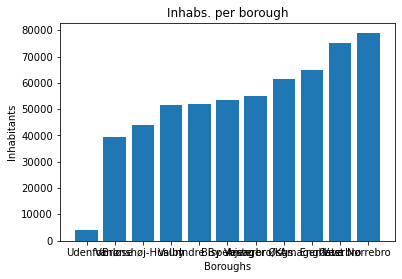

In [2]:
# 1.4 barchart
%matplotlib inline
boroughs = list(neighb.values())
zipObj = zip(boroughs, hood)
answer = dict(zipObj)
sorted_answer = {}
sorted_keys = sorted(answer, key=answer.get)
for s in sorted_keys:
    sorted_answer[s] = answer[s]
    
def bars_neighb():
    inhabs = list(sorted_answer.values())
    bors = list(sorted_answer.keys())
    plt.xlabel("Boroughs")
    plt.ylabel("Inhabitants")
    plt.title("Inhabs. per borough")
    plt.bar(bors, inhabs)
    #plt.xticks(rotation=30, horizontalalignment='right', fontweight='light', fontsize='x-small')

    plt.show()

bars_neighb()

In [3]:
#1.5 over 65 & 1.6 How many of those were from the other nordic countries
over_65 = (dd[:,2] > 65)

print('Over 65: ')
print(np.sum(dd[all_mask & over_65] [:,4]))

Over 65: 
55750


In [5]:
#1.6
import numpy as np
scandi = (dd[:,3] == 5104) | (dd[:,3] == 5105) | (dd[:,3] == 5106) | (dd[:,3] == 5110) | (dd[:,3] == 5120)
print(np,sum(dd[all_mask & scandi & over_65][:,4]))

<module 'numpy' from '/opt/conda/lib/python3.7/site-packages/numpy/__init__.py'> 610.0


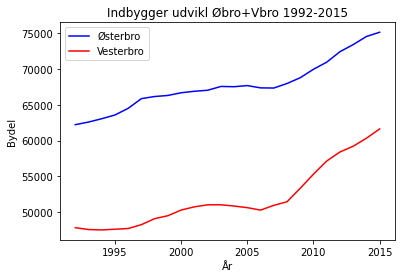

In [6]:
#1.7 Make a line plot showing the changes of number of people in vesterbro and østerbro from 1992 to 2015
import numpy as np
import matplotlib.pyplot as plt

filename = 'data/befkbhalderstatkode.csv'
dd = np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1)

def number_of_people_per_year(y, mask):
    all_people_in_given_n = dd[mask & (dd[:,0] == y)]
    sum_of_people = all_people_in_given_n[:,4].sum() # index 4 is no of 'PERSONER'
    return sum_of_people

obro_mask = (dd[:,1] == 2)
vbro_mask = (dd[:,1] == 4)
oster_vester_mask = ((dd[:,1] == 2) | (dd[:,1] == 4))

years = list(range(1992,2016))

sum_vbro = np.array([number_of_people_per_year(y, vbro_mask) for y in years])
sum_osterbro = np.array([number_of_people_per_year(y, obro_mask) for y in years])
oester_vester_sum = np.array([number_of_people_per_year(y, oster_vester_mask) for y in years])

def plot_hoods():
    plt.xlabel("År")
    plt.ylabel("Bydel")
    plt.title("Indbygger udvikl Øbro+Vbro 1992-2015")
    plt.plot(years, sum_osterbro, color='blue', label='Østerbro')
    plt.plot(years, sum_vbro, color='red', label='Vesterbro')
    plt.legend()
    plt.show()

plot_hoods()

## 04 Solution part 2

In [7]:
# 2.1-5 Now find out which city in 2020 has the highest percentage of men
import pandas as pd
import csv
import numpy as np


url = 'https://api.statbank.dk/v1/data/FOLK1A/CSV?valuePresentation=Code&delimiter=Semicolon&OMR%C3%85DE=000%2C084' \
      '%2C147%2C400%2C085%2C083%2C082%2C081%2C851%2C461%2C561%2C751&K%C3%98N=1%2C2&ALDER=0%2C1%2C2%2C3%2C4%2C5%2C6' \
      '%2C7%2C8%2C9%2C10%2C11%2C12%2C13%2C14%2C15%2C16%2C17%2C18%2C19%2C20%2C21%2C22%2C23%2C24%2C25%2C26%2C27%2C28' \
      '%2C29%2C30%2C31%2C32%2C33%2C34%2C35%2C36%2C37%2C3%2C39%2C40%2C41%2C42%2C43%2C44%2C45%2C46%2C47%2C48%2C49%2C50' \
      '%2C51%2C52%2C53%2C54%2C55%2C56%2C57%2C58%2C59%2C60%2C61%2C62%2C63%2C64%2C65%2C66%2C67%2C68%2C69%2C70%2C71%2C72' \
      '%2C73%2C74%2C75%2C76%2C77%2C78%2C79%2C80%2C81%2C82%2C83%2C84%2C85%2C86%2C87%2C88%2C89%2C90%2C91%2C92%2C93%2C94' \
      '%2C95%2C96%2C97%2C98%2C99%2C100&Tid=2008K1%2C2009K1%2C2010K1%2C2011K1%2C2012K1%2C2013K1%2C2014K1%2C2015K1' \
      '%2C2016K1%2C2017K1%2C2018K1%2C2019K1%2C2020K1 '
df = pd.read_csv(url, sep=';')
df['TID'] = df['TID'].map(lambda x: x[:-2])  # cut the last 2 characters
df.to_csv('demografic_cleaned.csv', header=False, index=False)
data_file = 'demografic_cleaned.csv'
dd = np.loadtxt(data_file, delimiter=',', dtype=np.uint)

cits = np.unique(dd[:, 0])
#print(cits)
years = np.unique(dd[:,3])
#print(years)

def make_dict_codes_cities():
    city_codes = {}
    with open('data/bykoder.csv') as source:
        reader = csv.reader(source, delimiter=';')
        for row in reader:
            city_codes.update({int(row[0]): row[1].strip()})
    return city_codes

codes_cities = make_dict_codes_cities()
#print(codes_cities)

def citizens_in_region_2020(region):
    all_people_in_given_n = dd[(dd[:, 3] == 2020) & (dd[:, 0] == region)]
    sum_of_people = all_people_in_given_n[:, 4].sum()  # index 4 is no of 'PERSONER'
    return sum_of_people


def pct_male_in_city(citycodes):
    results = {}
    cities_translation = make_dict_codes_cities()
    for citycode in citycodes:
        total = citizens_in_region_2020(citycode)
        male_list = dd[(dd[:, 3] == 2020) & (dd[:, 0] == citycode) & (dd[:, 1] == 1)]
        male = male_list[:, 4].sum()
        pct_male = round((male / total) * 100, 2)
        results.update({cities_translation.get(citycode): pct_male})
    sorted_res = sorted(results.items(), key=lambda x: x[1], reverse=True)
    return sorted_res[0]

cities_in_scope = cits[cits > 100]
#print(type(cities_in_scope))
res = pct_male_in_city(cities_in_scope)
print(res)

('Aalborg', 50.41)


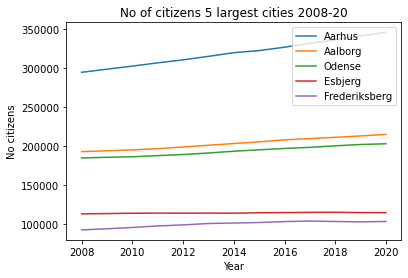

In [8]:
#Ex 2.6 Create a line chart with 5 lines showing population changes in the 5 largest cities from 2008 to 2020
%matplotlib inline
years = np.unique(dd[:, 3])
ys = list(years)
#print(ys)
a = np.unique(dd[:, 0])
cits = a[a > 100]
#print(cits)


def make_dict_codes_cities():
    city_codes = {}
    with open('data/bykoder.csv') as source:
        reader = csv.reader(source, delimiter=';')
        for row in reader:
            city_codes.update({int(row[0]): row[1].strip()})
    return city_codes


def five_largest_cities(citycodes):
    results = {}
    cities_translation = make_dict_codes_cities()
    for citycode in citycodes:
        all_people_in_given_n = dd[(dd[:, 3] == 2020) & (dd[:, 0] == citycode)]
        total = all_people_in_given_n[:, 4].sum()  # index 4 is no of 'PERSONER'
        results.update({citycode: total})
    sorted_res = sorted(results.items(), key=lambda x: x[1], reverse=True)
    return sorted_res[0:5]


def number_of_people_per_city_per_year(mask, year):
    people_per_year = dd[mask & (dd[:,3] == year)]
    sum_year = people_per_year[:, 4].sum()
    return sum_year


def chart_five_largest():
    c_names = make_dict_codes_cities()
    selection = five_largest_cities(cits)
    years = list(np.unique(dd[:, 3]))
    for s in selection:
        mask = (dd[:,0] == s[0])
        res = np.array([number_of_people_per_city_per_year(mask, y) for y in ys])
        #values = dict(zip(years, res))
        #plt.plot(values.keys(), values.values(), label=c_names.get(s[0]))
        y_vals = list(res)
        x_vals = years
        plt.plot(x_vals, y_vals, label=c_names.get(s[0]))
    # Set chart title and label axes.
    plt.title("No of citizens 5 largest cities 2008-20")
    plt.xlabel("Year")
    plt.ylabel("No citizens")
    plt.legend()
    plt.show()

chart_five_largest()